# Mapping the Current Fire Perimeter

In [19]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v2')
sys.path.append('/uufs/chpc.utah.edu/sys/pkg/python/2.7.3_rhel6/lib/python2.7/site-packages/')
from BB_basemap.draw_maps import draw_CONUS_HRRR_map

AttributeError: 'Figure' object has no attribute 'add_collection'

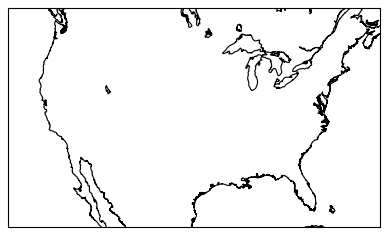

In [21]:
fig = plt.figure(1)
m = draw_CONUS_HRRR_map()

# Overlay Fire Perimeters
per = m.readshapefile('/uufs/chpc.utah.edu/common/home/u0553130/oper/HRRR_fires/fire_shapefiles/active_perimeters_dd83', 'perim', drawbounds=False)
patches = []

for info, shape in zip(m.perim_info, m.perim):
    # Check if the boundary is one of the large active fires
    patches.append(Polygon(np.array(shape), True) )
m.drawcoastlines()
fig.add_collection(PatchCollection(patches, facecolor='indianred', alpha=.65, edgecolor='k', linewidths=.1, zorder=1))